In [6]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import time
import os
from sklearn.model_selection import train_test_split

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.decomposition import PCA

import tensorflow as tf

from tensorflow.keras import models, layers
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import load_modelfrom tensorflow.keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [7]:
# Load and preprocess CIFAR-10 data
(train_images, train_labels), (testing_images, testing_labels) = cifar10.load_data()

# 40k training
# 10k validating
# 10k testing
# Further split training set into training and validation sets
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)
# test_size=0.2 is the proportion of the dataset to be used for validation set
# random_state=42 the split will always produce the same subsets of training and validation data
# ensuring consistency in your experiment

In [8]:
# Normalize image data to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0
testing_images = testing_images.astype('float32')/255.0

In [9]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model-1.keras',  # Save the best model to a file
    monitor='val_loss',       # Save the model with the lowest validation loss
    save_best_only=True       # Only save when there's an improvement
)

In [5]:
# MODEL DEFINITION
model = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
model.add(Conv2D(16, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
model.add(Flatten())
model.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/home/ntoylker/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-24 21:58:43.660110: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       115,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,010 (453.16 KB)

 Trainable params: 116,010 (453.16 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = model.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15


2024-11-24 21:58:44.166193: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3356 - loss: 1.8114 - val_accuracy: 0.5145 - val_loss: 1.3817
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5254 - loss: 1.3417 - val_accuracy: 0.5547 - val_loss: 1.2673
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5745 - loss: 1.2078 - val_accuracy: 0.5793 - val_loss: 1.2128
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5989 - loss: 1.1423 - val_accuracy: 0.5822 - val_loss: 1.1900
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6211 - loss: 1.0791 - val_accuracy: 0.5896 - val_loss: 1.1817
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6320 - loss: 1.0534 - val_accuracy: 0.5890 - val_loss: 1.1855
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6430 - loss: 1.0223 - val_accuracy: 0.5641 - val_loss: 1.2526
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6487 - loss: 1.0039

In [7]:
# TESTING
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5959 - loss: 1.1849


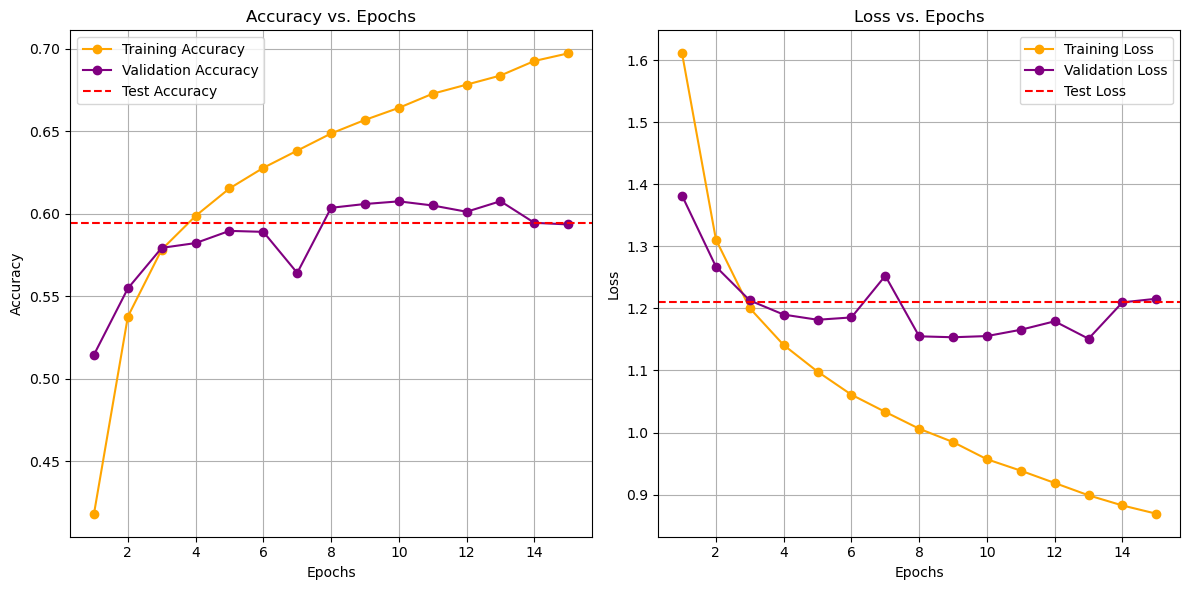

In [8]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# CHANGING THE FILTERS 

modela = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modela.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modela.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modela.add(Flatten())
modela.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modela.add(Dense(10, activation='softmax'))

# Compile the model
modela.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modela.summary()

/home/ntoylker/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-25 10:35:16.748357: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,658 (904.91 KB)

 Trainable params: 231,658 (904.91 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modela.fit(
    train_images,
    train_labels,
    epochs=30, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/30


2024-11-25 10:35:24.757168: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2238 - loss: 2.0685

2024-11-25 10:35:42.014194: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2239 - loss: 2.0682 - val_accuracy: 0.2871 - val_loss: 1.7319
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3542 - loss: 1.6636 - val_accuracy: 0.4001 - val_loss: 1.5655
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4092 - loss: 1.5538 - val_accuracy: 0.4227 - val_loss: 1.5060
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4552 - loss: 1.4719 - val_accuracy: 0.4800 - val_loss: 1.4048
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5019 - loss: 1.3613 - val_accuracy: 0.4990 - val_loss: 1.3647
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5211 - loss: 1.3117 - val_accuracy: 0.5017 - val_loss: 1.3614
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5378 - loss: 1.2654 - val_accuracy: 0.5238 - val_loss: 1.3030
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5558 - loss: 1.22

In [12]:
# TESTING
test_loss, test_accuracy = modela.evaluate(testing_images, testing_labels)

  4/313 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6107 - loss: 1.1132 

2024-11-25 10:44:08.674825: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5719 - loss: 1.2741


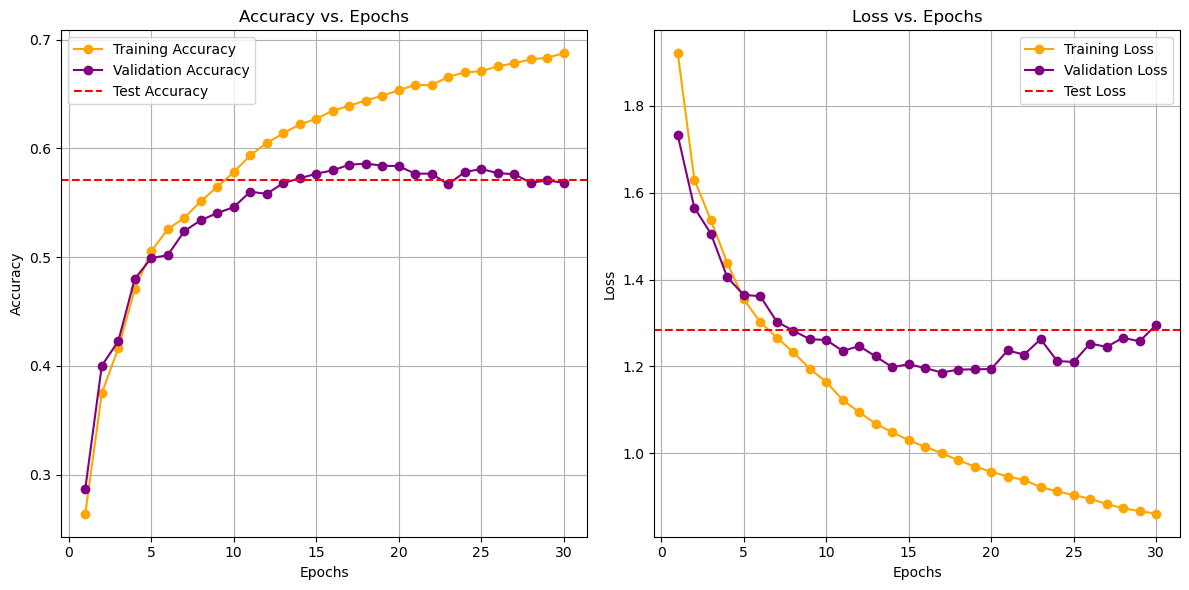

In [13]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# CHANGING THE PADDING 

modeld = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modeld.add(Conv2D(16, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='same'))
modeld.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modeld.add(Flatten())
modeld.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modeld.add(Dense(10, activation='softmax'))

# Compile the model
modeld.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modeld.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,882 (515.16 KB)

 Trainable params: 131,882 (515.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modeld.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15


2024-11-24 22:15:13.627625: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2589 - loss: 2.0065 - val_accuracy: 0.4882 - val_loss: 1.4262
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5063 - loss: 1.3662 - val_accuracy: 0.5268 - val_loss: 1.3365
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5626 - loss: 1.2414 - val_accuracy: 0.5775 - val_loss: 1.2101
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5923 - loss: 1.1563 - val_accuracy: 0.5816 - val_loss: 1.1889
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6120 - loss: 1.0990 - val_accuracy: 0.5947 - val_loss: 1.1550
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6384 - loss: 1.0356 - val_accuracy: 0.6073 - val_loss: 1.1269
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6510 - loss: 0.9921 - val_accuracy: 0.6024 - val_loss: 1.1457
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6528 - loss: 0.9814 - val

In [15]:
# TESTING
test_loss, test_accuracy = modeld.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6037 - loss: 1.1524


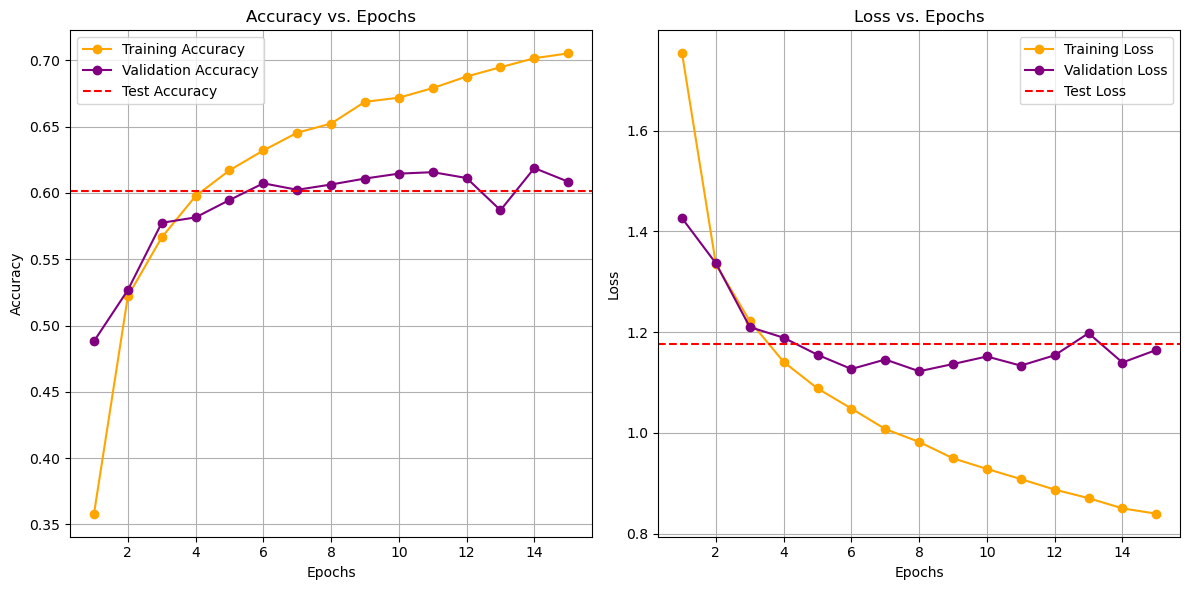

In [16]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# ADDING A CONV2D LAYER  of 64 filters

modele = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modele.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modele.add(MaxPooling2D((2, 2)))

modele.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='valid'))
modele.add(MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modele.add(Flatten())
modele.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modele.add(Dense(10, activation='softmax'))

# Compile the model
modele.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modele.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,482 (365.16 KB)

 Trainable params: 93,482 (365.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modele.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15


2024-11-24 22:35:23.076831: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.3357 - loss: 1.7964 - val_accuracy: 0.5335 - val_loss: 1.3096
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5566 - loss: 1.2544 - val_accuracy: 0.5880 - val_loss: 1.1472
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6088 - loss: 1.1086 - val_accuracy: 0.6290 - val_loss: 1.0514
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6428 - loss: 1.0082 - val_accuracy: 0.6504 - val_loss: 1.0002
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6689 - loss: 0.9410 - val_accuracy: 0.6551 - val_loss: 0.9979
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.6927 - loss: 0.8831 - val_accuracy: 0.6526 - val_loss: 1.0076
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.7067 - loss: 0.8396 - val_accuracy: 0.6699 - val_loss: 0.9561
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.7245 - loss: 0.79

In [23]:
# TESTING
test_loss, test_accuracy = modele.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6837 - loss: 0.9939


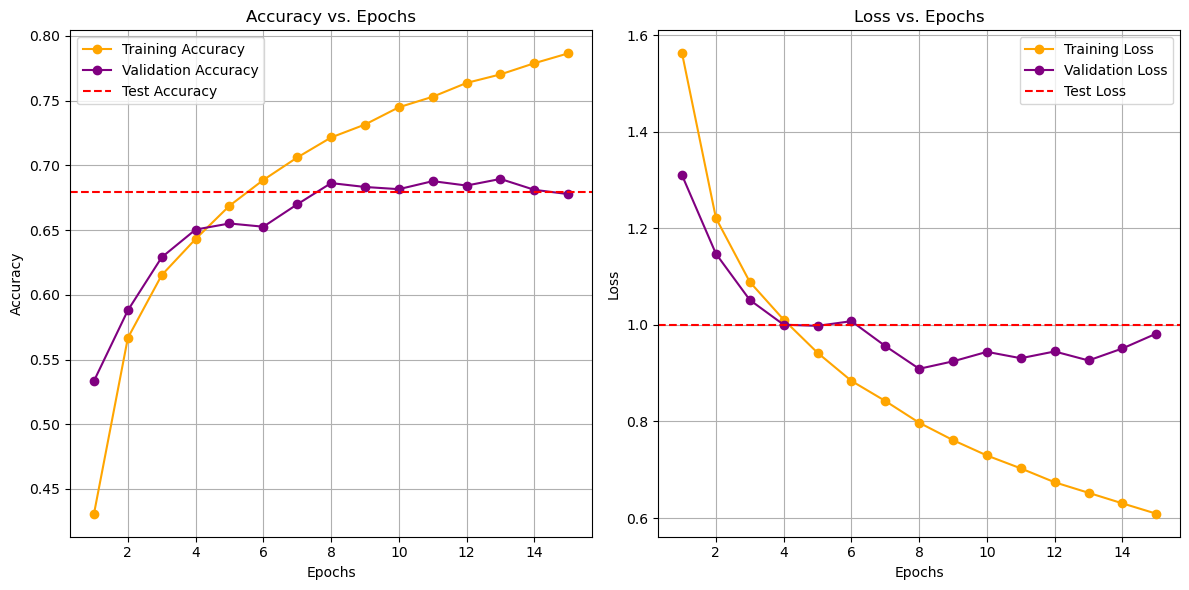

In [24]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# CHANGING MAXPOOLING SIZE TO MORE AGGRESSIVE (3,3)

modelg = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelg.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modelg.add(MaxPooling2D((3,3)))

# Flatten the output and add a fully connected layer (MLP)
modelg.add(Flatten())
modelg.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelg.add(Dense(10, activation='softmax'))

# Compile the model
modelg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelg.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │       102,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,658 (404.91 KB)

 Trainable params: 103,658 (404.91 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelg.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15


2024-11-24 22:52:35.790497: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2315 - loss: 2.0333 - val_accuracy: 0.3996 - val_loss: 1.6364
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4151 - loss: 1.5897 - val_accuracy: 0.4467 - val_loss: 1.5098
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4749 - loss: 1.4223 - val_accuracy: 0.5086 - val_loss: 1.3616
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5097 - loss: 1.3314 - val_accuracy: 0.5200 - val_loss: 1.3216
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5360 - loss: 1.2721 - val_accuracy: 0.5412 - val_loss: 1.2855
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5530 - loss: 1.2357 - val_accuracy: 0.5403 - val_loss: 1.2654
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5532 - loss: 1.2233 - val_accuracy: 0.5638 - val_loss: 1.2083
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5809 - loss: 1.15

In [29]:
# TESTING
test_loss, test_accuracy = modelg.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5976 - loss: 1.1235


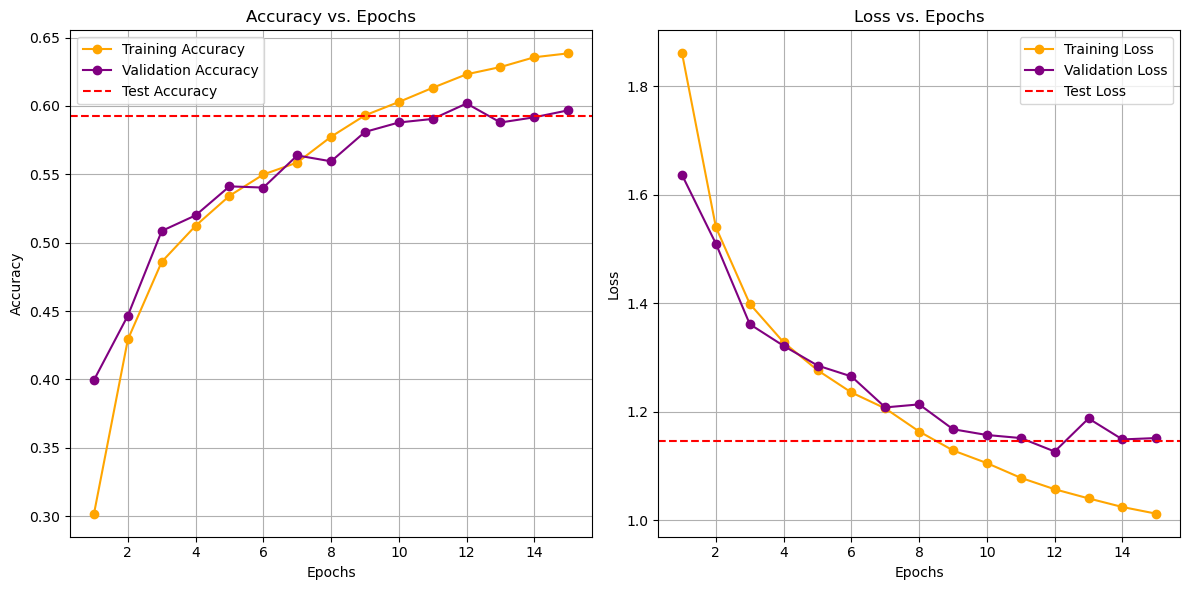

In [30]:
# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# BATCH_NORMALIZATION

modelh = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelh.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modelh.add(BatchNormalization())
modelh.add(MaxPooling2D((2,2)))

# Flatten the output and add a fully connected layer (MLP)
modelh.add(Flatten())
modelh.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelh.add(Dense(10, activation='softmax'))

# Compile the model
modelh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelh.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,786 (905.41 KB)

 Trainable params: 231,722 (905.16 KB)

 Non-trainable params: 64 (256.00 B)

In [34]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelh.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4215 - loss: 1.6494 - val_accuracy: 0.5302 - val_loss: 1.3843
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.6042 - loss: 1.1261 - val_accuracy: 0.5657 - val_loss: 1.2765
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6713 - loss: 0.9410 - val_accuracy: 0.5666 - val_loss: 1.2700
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.7166 - loss: 0.8123 - val_accuracy: 0.6082 - val_loss: 1.2072
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7549 - loss: 0.6886 - val_accuracy: 0.5959 - val_loss: 1.2449
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.7922 - loss: 0.5905 - val_accuracy: 0.5899 - val_loss: 1.3607
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.8147 - loss: 0.5237 - val_accuracy: 0.5983 - val_loss: 1.4613
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.8434 -

In [37]:
# TESTING
test_loss, test_accuracy = modelh.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5496 - loss: 2.7702


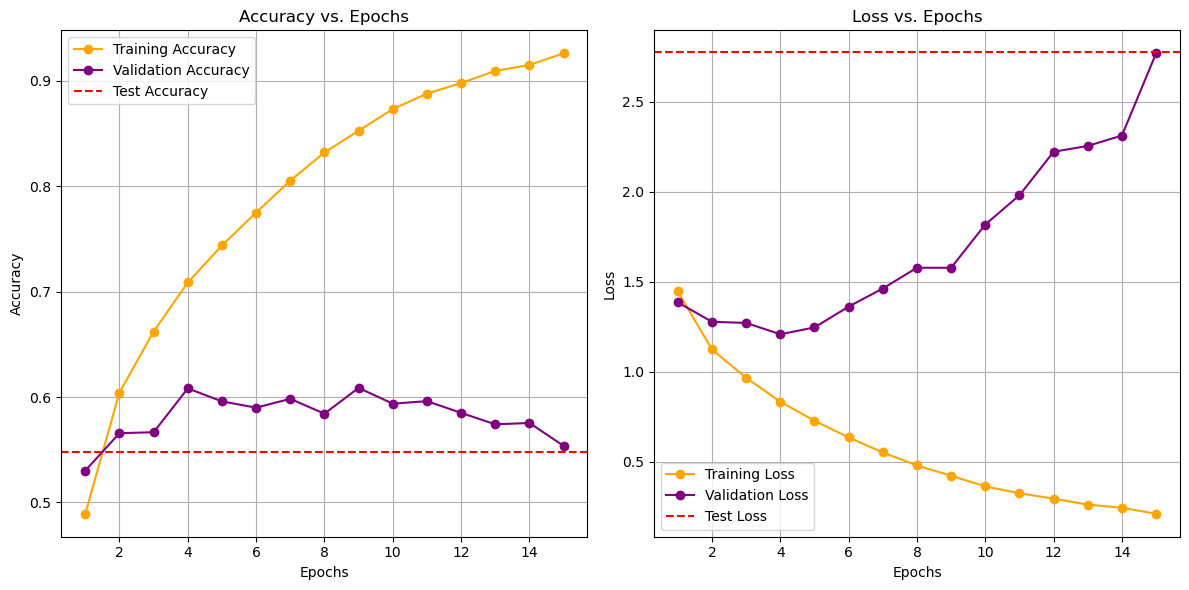

In [36]:
# TESTING
test_loss, test_accuracy = modelh.evaluate(testing_images, testing_labels)

# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# DROPOUT(0.5)

modelj = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modelj.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modelj.add(MaxPooling2D((2,2)))

# Flatten the output and add a fully connected layer (MLP)
modelj.add(Flatten())
modelj.add(Dropout(0.5))
modelj.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modelj.add(Dense(10, activation='softmax'))

# Compile the model
modelj.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modelj.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │       230,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,658 (904.91 KB)

 Trainable params: 231,658 (904.91 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modelj.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.3475 - loss: 1.8148 - val_accuracy: 0.5305 - val_loss: 1.3399
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.5235 - loss: 1.3496 - val_accuracy: 0.5586 - val_loss: 1.2657
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.5612 - loss: 1.2657 - val_accuracy: 0.5708 - val_loss: 1.2466
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.5732 - loss: 1.2097 - val_accuracy: 0.5921 - val_loss: 1.1809
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.5981 - loss: 1.1542 - val_accuracy: 0.6103 - val_loss: 1.1323
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.6028 - loss: 1.1335 - val_accuracy: 0.6107 - val_loss: 1.1469
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.6245 - loss: 1.0896 - val_accuracy: 0.6204 - val_loss: 1.0962
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 38ms/step - accuracy: 0.6224 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6467 - loss: 1.0383


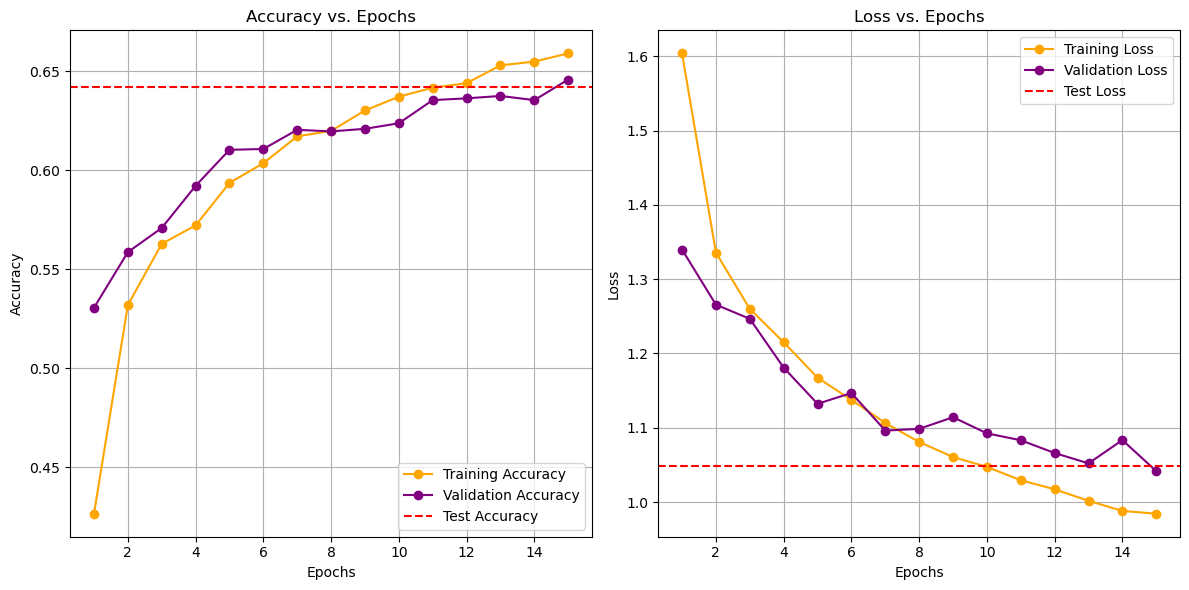

In [48]:
# TESTING
test_loss, test_accuracy = modelj.evaluate(testing_images, testing_labels)

# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop training if val_loss doesn't improve for 3 consecutive epochs
    restore_best_weights=True  # Restore weights from the epoch with the best val_loss
)

# ADDING A 3d CONV2D LAYER  of 64 filters

modell = models.Sequential()
input_shape=(32, 32, 3)

# CNN part with a single Conv2D and MaxPooling2D
modell.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape, strides=(1,1), padding='valid'))
modell.add(MaxPooling2D((2, 2)))

modell.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='valid'))
modell.add(MaxPooling2D((2, 2)))

modell.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modell.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add a fully connected layer (MLP)
modell.add(Flatten())
modell.add(Dense(32, activation='relu'))

# Output layer with softmax for classification (CIFAR-10 has 10 classes)
modell.add(Dense(10, activation='softmax'))

# Compile the model
modell.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
modell.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,114 (293.41 KB)

 Trainable params: 75,114 (293.41 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# INITIAL 40K IMAGES TRAINING DATA

start_time = time.time()

history = modell.fit(
    train_images,
    train_labels,
    epochs=15, # EARLY_STOPPING WILL DEAL WITH OVERFITTING,
    batch_size=32,
    validation_data=(validation_images, validation_labels),
    shuffle=True,
    #callbacks=[early_stopping, model_checkpoint]
)
# Print the epoch where training stopped
print(f"Training stopped at epoch {len(history.history['loss'])}")

end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time:.2f} seconds")

# Extract accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
#print(train_loss, val_loss, train_accuracy, val_accuracy)# TESTING

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 0.3180 - loss: 1.8287 - val_accuracy: 0.5171 - val_loss: 1.3340
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.5425 - loss: 1.2815 - val_accuracy: 0.5745 - val_loss: 1.1992
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 70ms/step - accuracy: 0.6080 - loss: 1.1113 - val_accuracy: 0.6259 - val_loss: 1.0636
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 71ms/step - accuracy: 0.6551 - loss: 0.9882 - val_accuracy: 0.6598 - val_loss: 0.9869
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.6902 - loss: 0.8895 - val_accuracy: 0.6703 - val_loss: 0.9416
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 74ms/step - accuracy: 0.7167 - loss: 0.8116 - val_accuracy: 0.6753 - val_loss: 0.9434
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 71ms/step - accuracy: 0.7328 - loss: 0.7731 - val_accuracy: 0.6743 - val_loss: 0.9567
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.7515 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7022 - loss: 0.9848


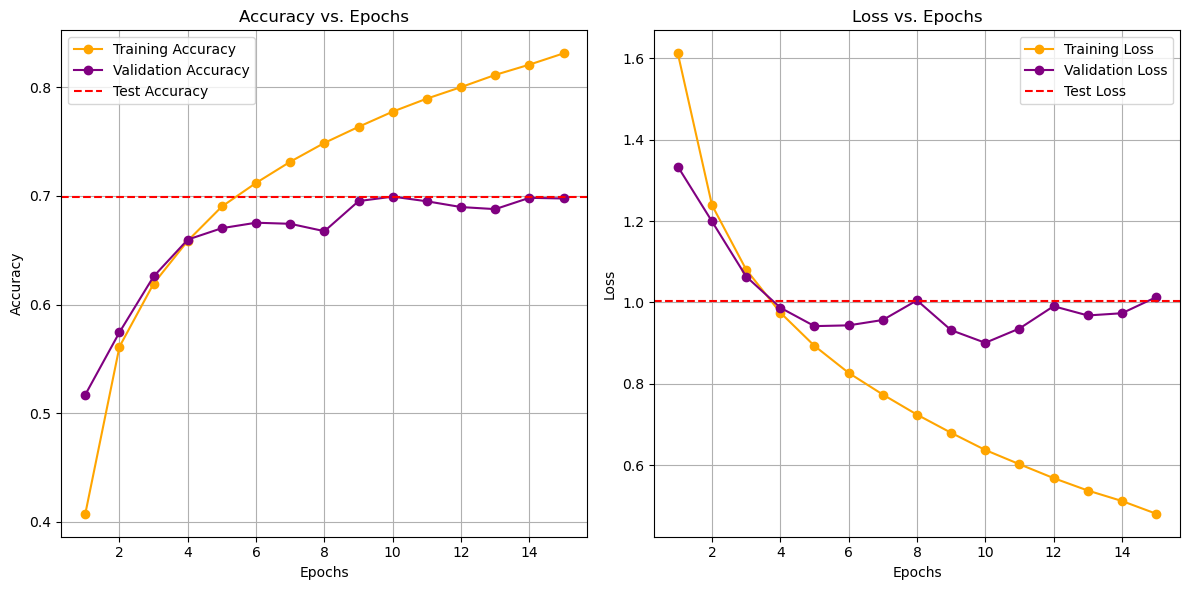

In [45]:
# TESTING
test_loss, test_accuracy = modell.evaluate(testing_images, testing_labels)

# Plot training and validation accuracy/loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(epochs, train_accuracy, color='orange', label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, color='purple', label='Validation Accuracy', marker='o')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(epochs, train_loss, color='orange', label='Training Loss', marker='o')
plt.plot(epochs, val_loss, color='purple', label='Validation Loss', marker='o')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()